In [7]:
print("Hello")

Hello


In [8]:
import pandas as pd
olympics = pd.read_csv('athlete_events.csv')

In [9]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
olympics.shape

(271116, 15)

In [11]:
olympics['Medal'].fillna('DNW', inplace = True)

/var/folders/56/0rq8hqtj35g4n65wgy88kr000000gn/T/ipykernel_21060/2160398606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics['Medal'].fillna('DNW', inplace = True)


In [12]:
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


In [13]:
print(olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: count, dtype: int64


In [14]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW


In [15]:
olympics['Age'].fillna(olympics['Age'].median(), inplace=True)
olympics['Height'].fillna(olympics['Height'].median(), inplace=True)
olympics['Weight'].fillna(olympics['Weight'].median(), inplace=True)

/var/folders/56/0rq8hqtj35g4n65wgy88kr000000gn/T/ipykernel_21060/2406151213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics['Age'].fillna(olympics['Age'].median(), inplace=True)
/var/folders/56/0rq8hqtj35g4n65wgy88kr000000gn/T/ipykernel_21060/2406151213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [16]:
print(olympics.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


Matplotlib is building the font cache; this may take a moment.


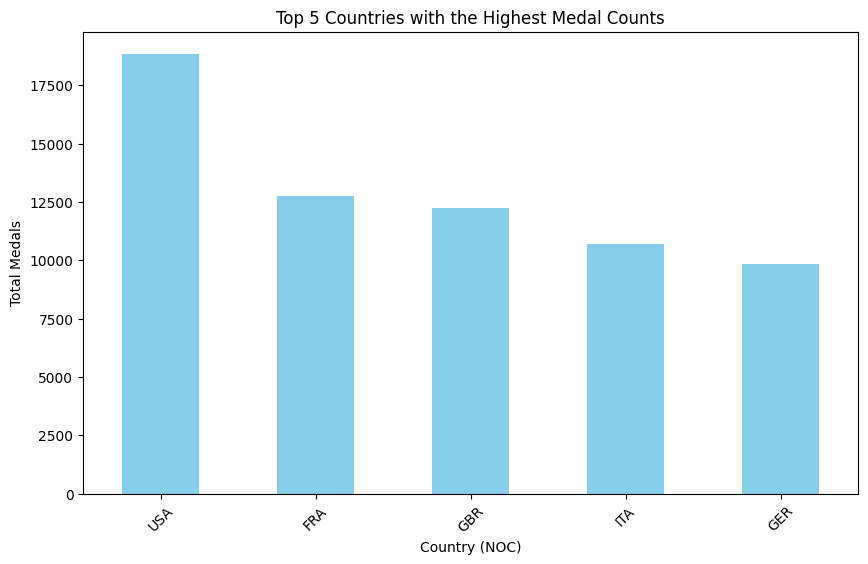

In [21]:
#TOP 5 COUNTRIES WITH THE HIGHEST MEDALS
import matplotlib.pyplot as plt

# Filter only the rows where a medal was won
medal_df = olympics[olympics['Medal'].notna()]

# Count the total number of medals for each country (NOC)
medal_counts = medal_df['NOC'].value_counts().head(5)

# Plot the top 5 countries with the highest medals
plt.figure(figsize=(10, 6))
medal_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with the Highest Medal Counts')
plt.xlabel('Country (NOC)')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()


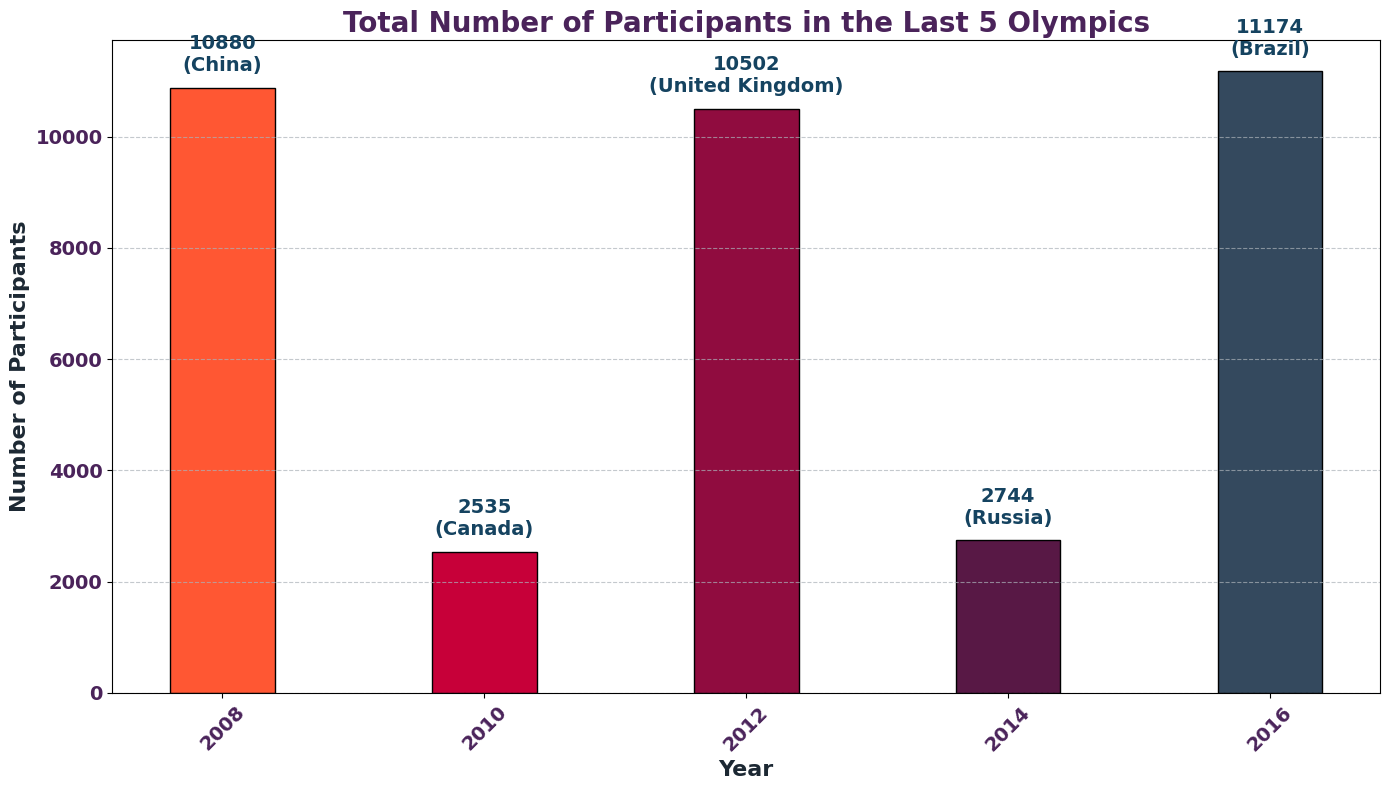

In [22]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a dictionary to map years to host countries
host_countries = {
    2008: "China",
    2010: "Canada",
    2012: "United Kingdom",
    2014: "Russia",
    2016: "Brazil"
}

# Count the number of unique participants (by Name) in each Olympic year
participants_per_year = olympics.groupby('Year')['Name'].nunique()

# Filter to show only the last 5 Olympics
last_5_olympics = participants_per_year.tail(5)

# Plotting the bar chart for the last 5 Olympics
plt.figure(figsize=(14, 8))
bars = plt.bar(last_5_olympics.index, last_5_olympics.values, color=['#FF5733', '#C70039', '#900C3F', '#581845', '#34495E'], edgecolor='black')

# Enhancing the plot
plt.title('Total Number of Participants in the Last 5 Olympics', fontsize=20, fontweight='bold', color='#4A235A')
plt.xlabel('Year', fontsize=16, fontweight='bold', color='#1C2833')
plt.ylabel('Number of Participants', fontsize=16, fontweight='bold', color='#1C2833')
plt.grid(True, linestyle='--', alpha=0.7, color='#ABB2B9', axis='y')
plt.xticks(last_5_olympics.index, rotation=45, fontsize=14, fontweight='bold', color='#4A235A')
plt.yticks(fontsize=14, fontweight='bold', color='#4A235A')

# Adding the data labels on top of the bars
for bar, year in zip(bars, last_5_olympics.index):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 300, f"{yval}\n({host_countries[year]})", ha='center', fontsize=14, fontweight='bold', color='#154360')

plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the total number of medals for each athlete
athlete_medal_counts = medal_df['Name'].value_counts()

# Identify the top 5 athletes with the highest medals
top_5_athletes = athlete_medal_counts.nlargest(5)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
top_5_athletes.plot(kind='barh', color='orange')
plt.title('Top 5 Athletes with the Highest Number of Medals in Olympic History')
plt.xlabel('Total Medals')
plt.ylabel('Athlete')
plt.gca().invert_yaxis()  # To display the athlete with the most medals at the top
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

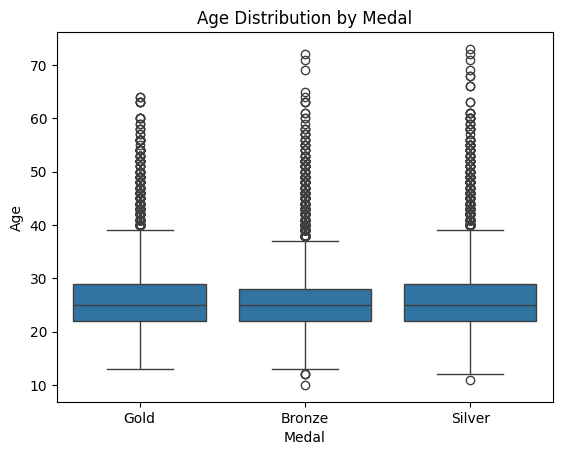

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where Medal is 'DNW'
df_filtered = olympics[olympics['Medal'] != 'DNW']

# Create a boxplot
sns.boxplot(x='Medal', y='Age', data=df_filtered)
plt.title('Age Distribution by Medal')
plt.show()

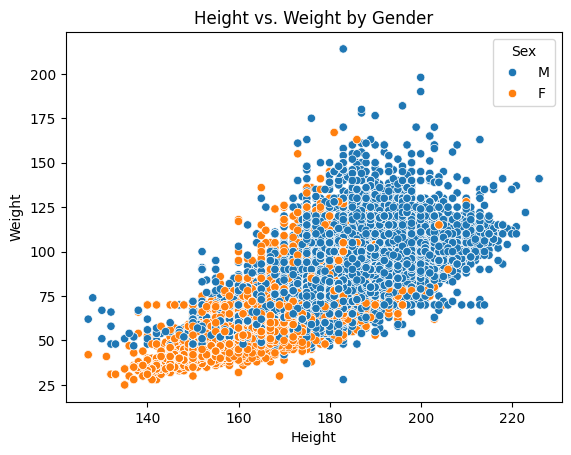

In [ ]:
sns.scatterplot(data=olympics, x='Height', y='Weight', hue='Sex')
plt.title('Height vs. Weight by Gender')
plt.show()


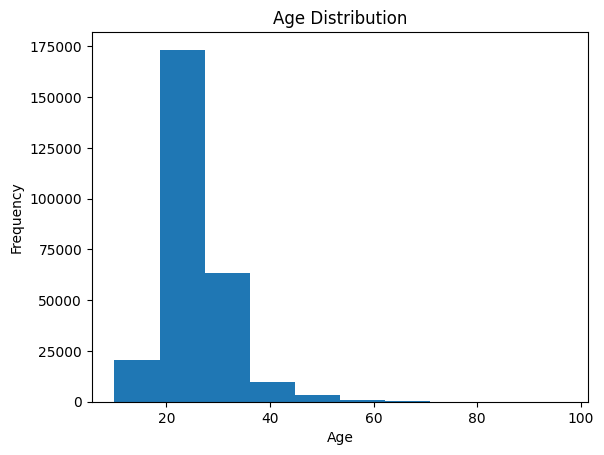

In [ ]:
olympics['Age'].plot(kind='hist', bins=10, title='Age Distribution')
plt.xlabel('Age')
plt.show()


In [ ]:
#PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('athlete_events.csv')  # Replace with your actual file

# Preprocessing
# Drop rows with missing target values (Medal)
data = data.dropna(subset=['Medal'])

# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Team', 'NOC', 'Games', 'City', 'Sport', 'Event', 'Season']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Encode the target variable
data['Medal'] = data['Medal'].map({'Gold': 1, 'Silver': 2, 'Bronze': 3, 'NaN': 0})

# Handling missing values in Age, Height, Weight
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Height'].fillna(data['Height'].mean(), inplace=True)
data['Weight'].fillna(data['Weight'].mean(), inplace=True)

# Define features and target
X = data.drop(columns=['Medal', 'ID', 'Name'])
y = data['Medal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.71      0.70      2722
           2       0.66      0.65      0.66      2542
           3       0.68      0.68      0.68      2693

    accuracy                           0.68      7957
   macro avg       0.68      0.68      0.68      7957
weighted avg       0.68      0.68      0.68      7957

